# Introduction to Pandas



---

### Table of Contents


1 - [Pandas and Dataframes](#section1)<br>


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.1 - [Importing Data](#subsection1)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.2 - [Statistics](#subsection2)<br>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1.3 - [Histograms and Standard Deviation](#subsection3)<br>


---
## 1. Pandas and Data Frames <a id='section1'></a>

First, let's make sure to import our libraries. Similar to how `np` is used as an alias for `numpy`, most people often use `pd` for `pandas`:

In [1]:
import numpy as np
import pandas as pd

### 1.1 Importing Data  <a id='subsection1'></a>

We will use the function `read_csv()` in the **Pandas** library to import and read our data. 
The _csv_ at the end of the function tells the program to read a "comma-delimited file" - a file where data is separated by commas. There are many types of delimiters such as tab, semicolon, pipe, etc. 

Let's revisit the data from our survey! We will read in _BLDAP2022DataSurvey.csv_ as a **DataFrame** and store it in a variable called bldap_data. When we read in the data file, we must include the fact that the file is saved in the folder _data_, so the computer knows where to look for the data file! We add the foldername before the filename and add a slash (/) between.

In [2]:
# EXAMPLE
# Read in results from survey and store it in a variable called bldap_data.

bldap_data = pd.read_csv('data/BLDAP2022DataSurvey.csv')

Great! Now let's explore our data set. 

We will begin by using the method (or function)  `.head()`. By default, it will show the first 5 rows of or data set, but you can tell it to display the first _n_ results by passing _n_ as an argument to `.head()`.

In [3]:
# EXAMPLE

bldap_data.head()

,Hours Slept,Number of Siblings,Birth Month and Day,Pineapple Pizza Rating
0,6,3,January 21,1
1,6,1,April 24,4
2,6,2,March 10,5
3,8,1,July 17,5
4,7,1,July 9,1


You can also see the last _n_ rows of our data using the method `.tail()`.

In [4]:
# EXAMPLE

bldap_data.tail()

,Hours Slept,Number of Siblings,Birth Month and Day,Pineapple Pizza Rating
87,7,2,October 2,1
88,7,2,September 25,1
89,7,1,June 14,1
90,6,2,March 27,1
91,6,4,December 9,1


`DataFrames` contain rows and columns. You can think of them as Google or Excel sheets. If you want to understand the structure of your DataFrame, there a few functions and attributes that might come handy. 

These include
* `shape`: outputs n rows and n columns
* `columns`: outputs names of columns
* `index`: outputs the indices in a format of (start, stop, step)
* `info()`: outputs info per each column, very useful for retrieving an index of each column, checking the format of data in each column (sometimes numbers can be in a form of a string and prevent you from running your calculations properly), it also shows you the number of Null (or missing) values per each columm.
* `len()`: just like with other data structures, we can use len( ) with DataFrames. 
* `describe()`: outputs basic statistics per each column like mean/median/mode, etc.

In [5]:
# EXAMPLE

bldap_data.shape

(92, 4)

This DataFrame contains 92 rows and 4 columns.

In [6]:
# EXAMPLE

bldap_data.columns

Index(['Hours Slept', 'Number of Siblings', 'Birth Month and Day',
       'Pineapple Pizza Rating'],
      dtype='object')

In [7]:
# EXAMPLE

bldap_data.index

RangeIndex(start=0, stop=92, step=1)

In [8]:
# EXAMPLE

bldap_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Hours Slept             92 non-null     int64 
 1   Number of Siblings      92 non-null     int64 
 2   Birth Month and Day     92 non-null     object
 3   Pineapple Pizza Rating  92 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 3.0+ KB


As with lists and arrays, you can also use the function `len()` to see how many elements (in this case rows) our data set contains.

In [9]:
# EXAMPLE

len(bldap_data)

92

### 1.2 Statistics  <a id='subsection2'></a>

A useful method is `.describe()`. Describe provides you with some basic statistics about each of the variables in your DataFrame including measures for tendency, dispersion and shape of a dataset's distribution, excluding **NaN** values (NaN "Not a Number" values represent missing data. In a later lesson we'll explore how to deal with missing data).

By default, it will return the summary statistics of the numeric columns. If you use the argument `include='all'`, it will also work with mixed data. For example, if the column is not numeric, it will return measures such as count, number of unique values, and the most frequent value (`top` is the value of the most frequent value, while `freq` tells you its frequency).

_Extra note: What if there are multiple top values with the same frequency (as is the case with our 'Birth Month and Day' column)? It turns out that pandas arbitrarily chooses a top value. If you restart the kernel of the whole notebook, you might get another value for top._

In [10]:
# EXAMPLE

bldap_data.describe(include='all')

,Hours Slept,Number of Siblings,Birth Month and Day,Pineapple Pizza Rating
count,92.000000,92.000000,92,92.000000
unique,NaN,NaN,85,NaN
top,NaN,NaN,June 30,NaN
freq,NaN,NaN,2,NaN
mean,7.076087,1.586957,NaN,2.793478
std,1.206518,1.196627,NaN,1.371115
min,4.000000,0.000000,NaN,1.000000
25%,6.000000,1.000000,NaN,1.000000
50%,7.000000,1.000000,NaN,3.000000
75%,8.000000,2.000000,NaN,4.000000


Pandas also has methods to calculate the mean, median, and mode separately. If you run the methods on the entire dataframe it will automatically figure out which columns are numerical and compute the means.

In the cells below, see if you can find the mean, median, and mode using `.mean()`, `.median()`, `.mode()`. The first one has been done for you.

In [11]:
#Find the mean

bldap_data.mean()

Hours Slept               7.076087
Number of Siblings        1.586957
Pineapple Pizza Rating    2.793478
dtype: float64

In [12]:
#Find the median

bldap_data.median()

Hours Slept               7.0
Number of Siblings        1.0
Pineapple Pizza Rating    3.0
dtype: float64

In [13]:
#Find the mode

bldap_data.mode()

,Hours Slept,Number of Siblings,Birth Month and Day,Pineapple Pizza Rating
0,7.0,1.0,April 12,1.0
1,NaN,NaN,April 5,NaN
2,NaN,NaN,December 31,NaN
3,NaN,NaN,January 16,NaN
4,NaN,NaN,June 14,NaN
5,NaN,NaN,June 30,NaN
6,NaN,NaN,October 6,NaN


When finding the mode, you can see that it returns a dataframe! If a column of data has more than one mode, you will see them all.

### 1.3 Histograms and Standard Deviation  <a id='subsection3'></a>

As you may imagine, pandas has a method that easily returns the standard deviation:

In [14]:
#Find the standard deviation

bldap_data.std()

Hours Slept               1.206518
Number of Siblings        1.196627
Pineapple Pizza Rating    1.371115
dtype: float64

Aside from looking at various statistical data for our dataset, a histogram is the best way to quickly inspect your data and get a feel for what you are dealing with. You can create a histogram by calling `dataframe.hist()`. Pandas will automatically decide how many boxes to create in your histogram.

The example below just looks at the column of 'Hours Slept'. (We will learn how to grab columns later!)

_Quick note: Use a semicolon ; at the end of the last line in a Jupyter notebook cell to suppress the notebooks from printing the return value of the last line. You can try removing the semicolon in the below cell and see how the output changes._

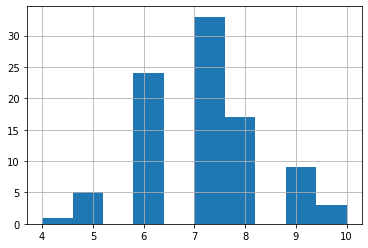

In [15]:
bldap_data_hours = bldap_data['Hours Slept']
bldap_data_hours.hist();

You can change the number of bins by using the argument `bins=` within the parentheses of `hist()`. Below try different bins and see how your histogram changes.

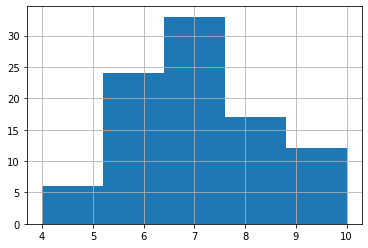

In [16]:
bldap_data_hours.hist(bins=5);

---
Notebook developed by: Kseniya Usovich, Baishakhi Bose, Alisa Bettale